<a href="https://colab.research.google.com/github/MatthewSebastian15/cyclegan-day2night/blob/main/Deep_learning_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Library

In [ ]:
import numpy as np
import os
import matplotlib.pyplot as plt
import os, random
import pillow_heif
from PIL import Image, ImageChops, ImageEnhance, ImageFilter
import matplotlib.pyplot as plt

# Load Dataset

In [ ]:
day = r'D:\KULIAH\SEMESTER 5\DEEP LEARNING\PROJECT\DATASET\DATA SEKUNDER\Day'
night = r'D:\KULIAH\SEMESTER 5\DEEP LEARNING\PROJECT\DATASET\DATA SEKUNDER\Night'

# Data Preprocessing

In [ ]:
def show_image(input_dir, title=""):
    file_list = [f for f in os.listdir(input_dir) if f.lower().endswith(('.jpg', '.jpeg', '.png'))][:20]
    plt.figure(figsize=(20, 5))
    for i, file_name in enumerate(file_list):
        img_path = os.path.join(input_dir, file_name)
        with Image.open(img_path) as img:
            plt.subplot(2, 10, i + 1)
            plt.imshow(img)
            plt.axis('off')

    plt.suptitle(title, fontsize=16)
    plt.tight_layout()
    plt.show()

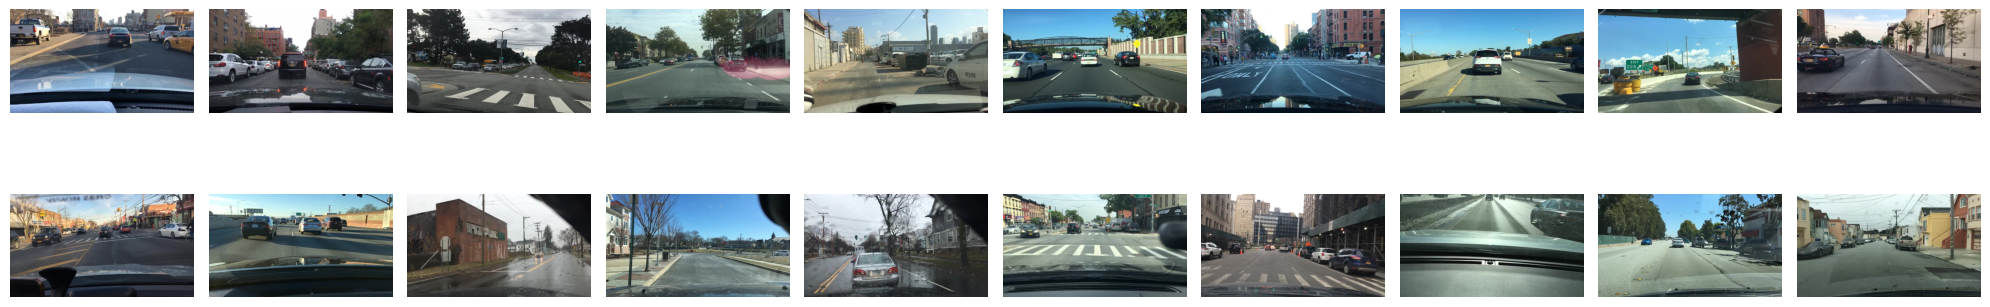

In [ ]:
show_image(day)

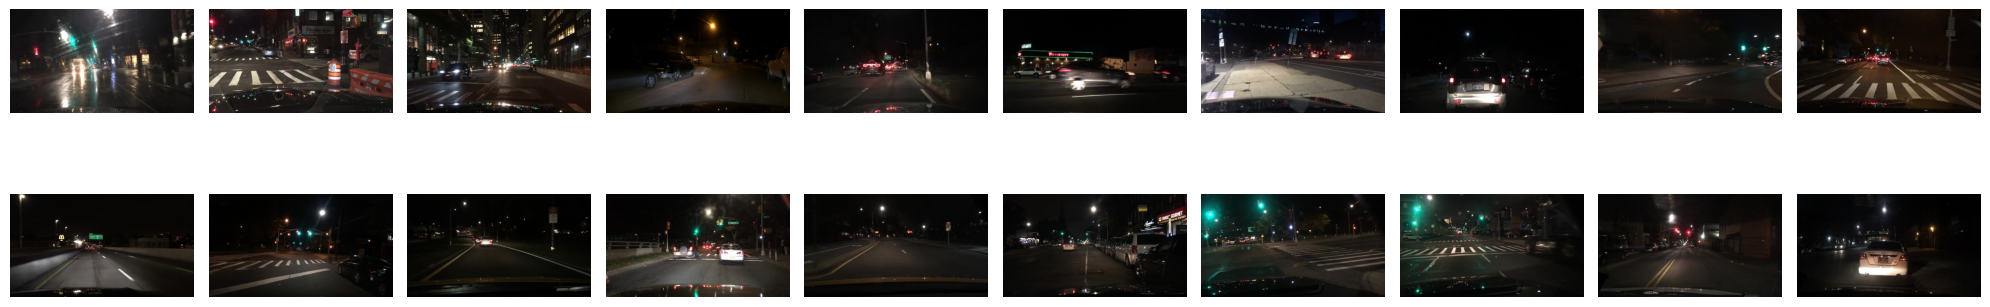

In [ ]:
show_image(night)

In [ ]:
day_Resized = r'D:\KULIAH\SEMESTER 5\DEEP LEARNING\PROJECT\DATASET\DATA SEKUNDER\Resized\Day'
night_Resized = r'D:\KULIAH\SEMESTER 5\DEEP LEARNING\PROJECT\DATASET\DATA SEKUNDER\Resized\Night'

os.makedirs(day_Resized, exist_ok=True)
os.makedirs(night_Resized, exist_ok=True)

def resize_images(input_dir, output_dir, size=(256, 256)):
    for filename in os.listdir(input_dir):
        if filename.lower().endswith(('.jpg', '.jpeg', '.png')):
            img_path = os.path.join(input_dir, filename)
            try:
                img = Image.open(img_path)
                img_resized = img.resize(size)
                save_path = os.path.join(output_dir, filename)
                img_resized.save(save_path)
            except Exception as e:
                print(f"Gagal memproses {filename}: {e}")

resize_images(day, day_Resized)
resize_images(night, night_Resized)

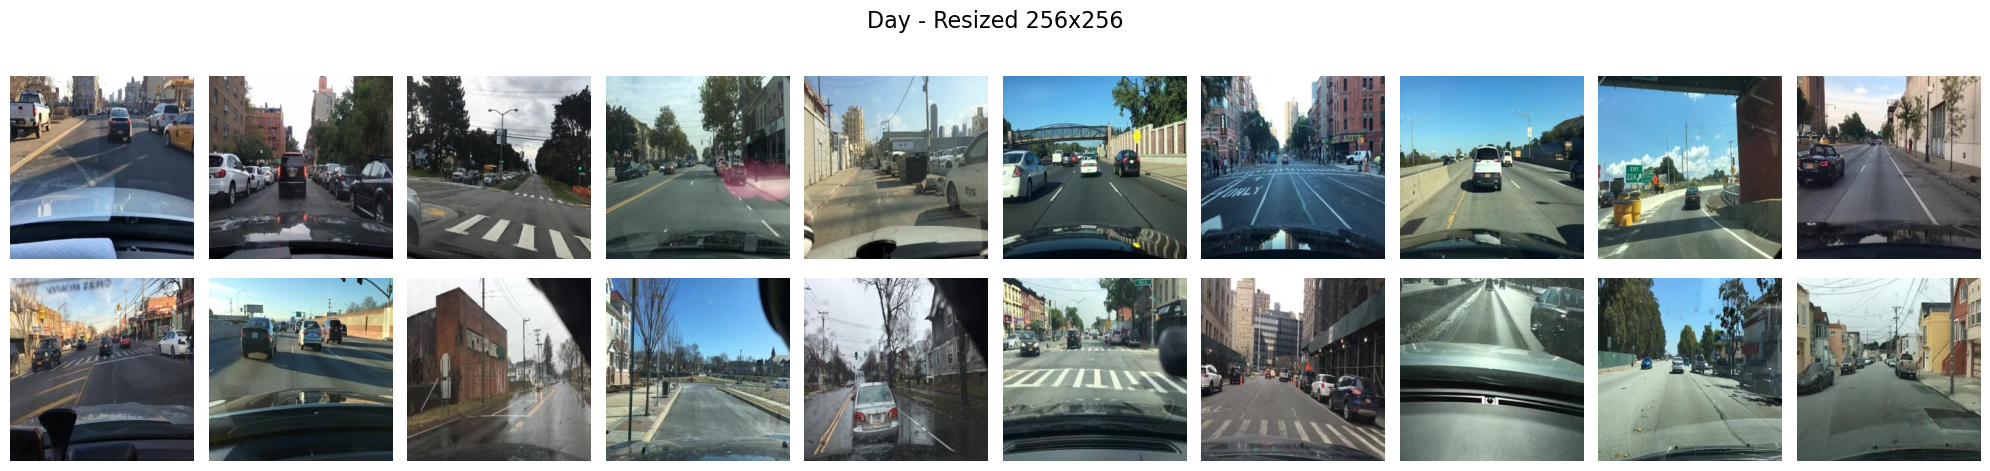

In [ ]:
show_image(day_Resized, title="Day - Resized 256x256")

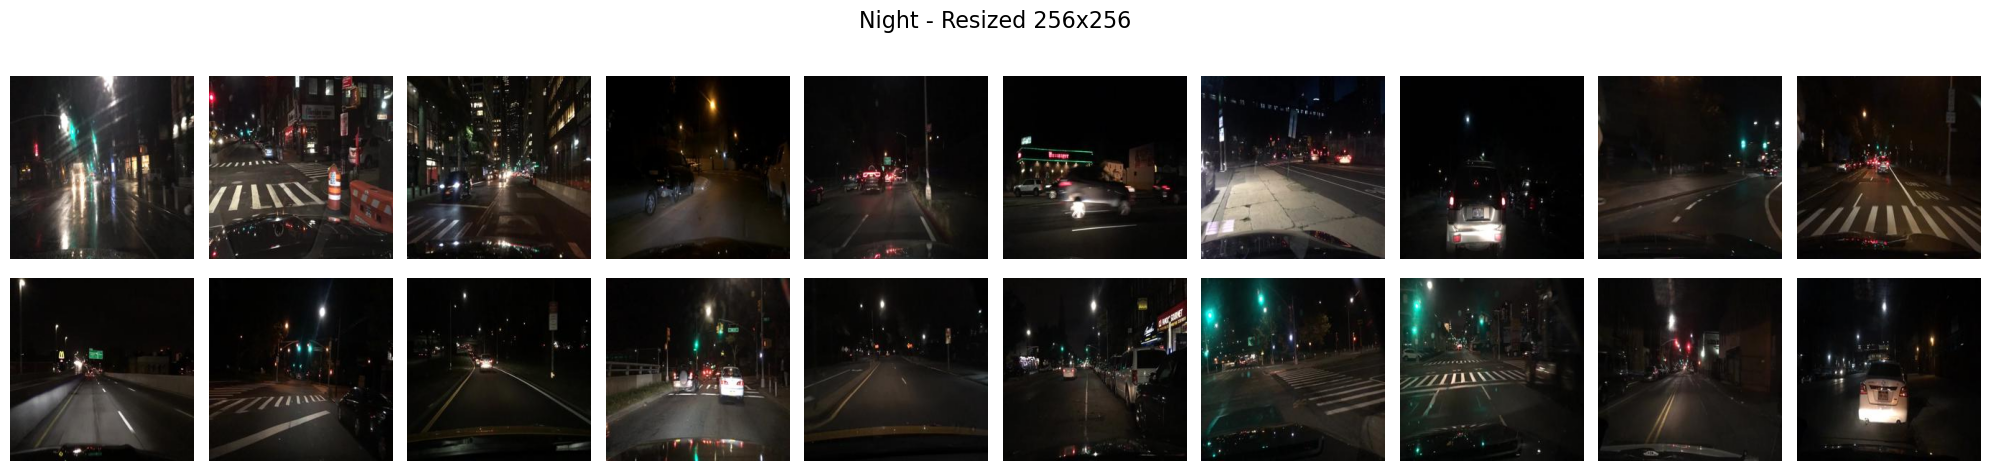

In [ ]:
show_image(night_Resized, title="Night - Resized 256x256")

# Exploratory Data Analysis (EDA)

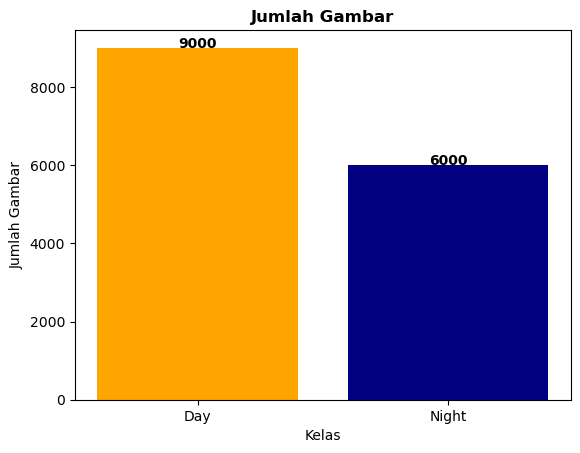

In [ ]:
num_day = len([f for f in os.listdir(day_Resized) if f.lower().endswith(('jpg', 'jpeg', 'png'))])
num_night = len([f for f in os.listdir(night_Resized) if f.lower().endswith(('jpg', 'jpeg', 'png'))])

labels = ["Day", "Night"]
values = [num_day, num_night]
colors = ["orange", "navy"]

plt.bar(labels, values, color=colors)

for i, v in enumerate(values):
    plt.text(i, v + 2, str(v), ha='center', fontweight='bold', fontsize=10, color='black')

plt.title("Jumlah Gambar", fontsize=12, fontweight='bold')
plt.ylabel("Jumlah Gambar")
plt.xlabel("Kelas")
plt.show()

In [ ]:
def visualize_RGB_distribution(image_path, title):
    img = np.array(Image.open(image_path).convert('RGB'))
    img = (img / 255.0)

    colors = ['red', 'green', 'blue']
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 4, 1)
    plt.imshow(img)
    plt.title(title)
    plt.axis("off")

    for i, color in enumerate(colors):
        plt.subplot(1, 4, i + 2)
        plt.hist((img[:, :, i] * 255).flatten(), bins=50, color=color, alpha=0.7)
        plt.title(f"{color.capitalize()} Channel")

    plt.tight_layout()
    plt.show()

day_sample = os.path.join(day_Resized, os.listdir(day_Resized)[0])
night_sample = os.path.join(night_Resized, os.listdir(night_Resized)[0])

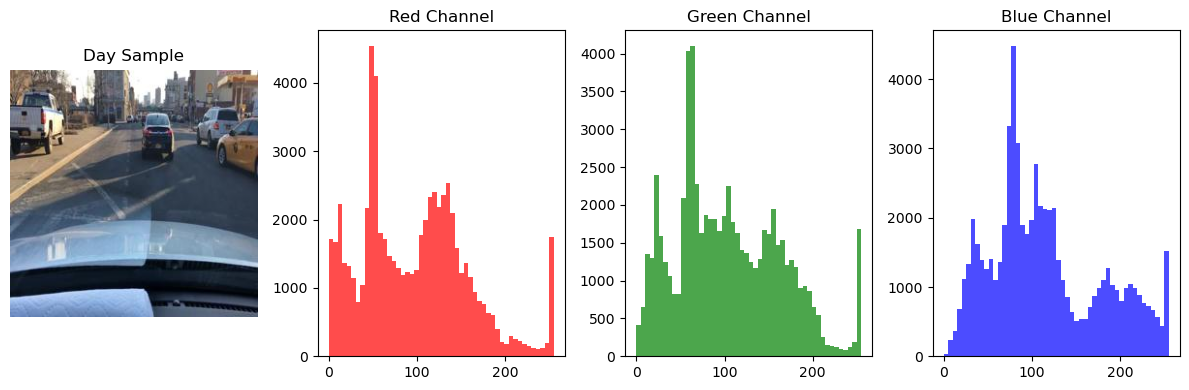

In [ ]:
visualize_RGB_distribution(day_sample, "Day Sample")

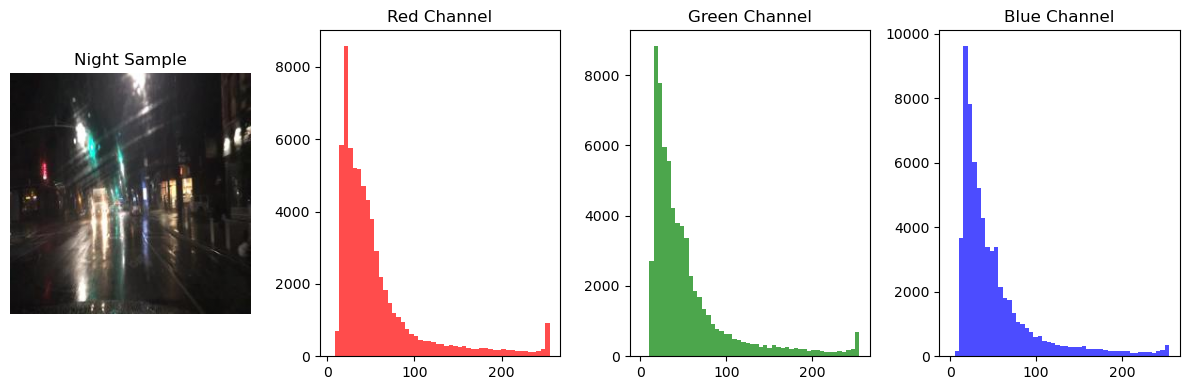

In [ ]:
visualize_RGB_distribution(night_sample, "Night Sample")

In [ ]:
def preview_image(input_dir):
    file_list = [f for f in os.listdir(input_dir)
                 if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

    file_name = file_list[0]
    img_path = os.path.join(input_dir, file_name)

    with Image.open(img_path) as img:
        w, h = img.size
        plt.figure(figsize=(6, 6))
        plt.imshow(img)

        plt.xlabel("Width (px)", fontsize=9)
        plt.ylabel("Height (px)", fontsize=9)

        plt.xticks(np.arange(0, w+1, w//5))
        plt.yticks(np.arange(0, h+1, h//5))

        plt.grid(True, color='white', linestyle='--', linewidth=0.6, alpha=0.7)
        plt.tight_layout()
        plt.show()

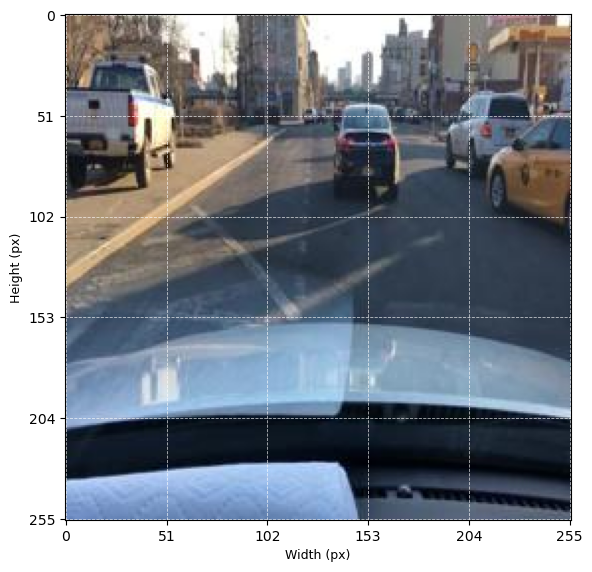

In [ ]:
preview_image(day_Resized)

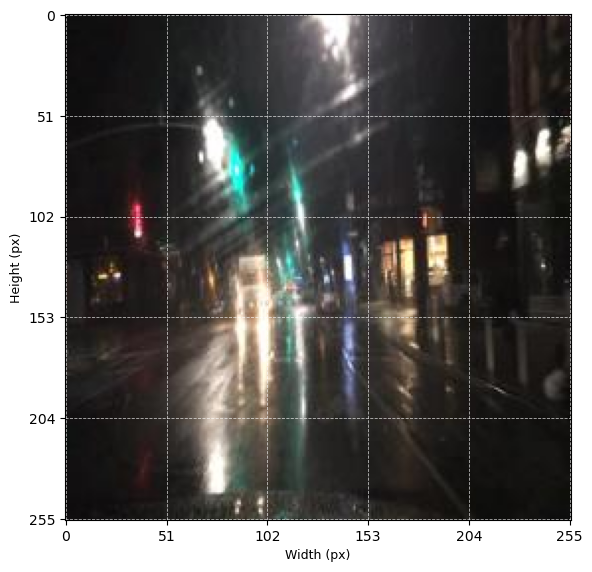

In [ ]:
preview_image(night_Resized)